In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [59]:
df = pd.read_csv("/content/Credit_score.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [60]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [61]:
df.shape

(100000, 27)

In [62]:
#Data type of every column
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [63]:
cat_columns, num_columns = list() , list()
CAT_THRESHOLD = 20
print("-"*150)
for col in df.columns:
  if df[col].nunique() > CAT_THRESHOLD:
    num_columns.append(col)
    print(col, " : " , df[col].nunique())

  else:
    cat_columns.append(col)
    print(col, " : " , df[col].nunique(),"\n")
    print(df[col].unique(),"\n")

  print("-"*150)

------------------------------------------------------------------------------------------------------------------------------------------------------
ID  :  100000
------------------------------------------------------------------------------------------------------------------------------------------------------
Customer_ID  :  12500
------------------------------------------------------------------------------------------------------------------------------------------------------
Month  :  8 

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'] 

------------------------------------------------------------------------------------------------------------------------------------------------------
Name  :  10139
------------------------------------------------------------------------------------------------------------------------------------------------------
Age  :  1788
-------------------------------------------------------------------------------------------------

In [64]:
#Info of each dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [65]:
df.isnull().sum()[df.isnull().sum() > 0 ]

,0
Name,9985
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


The above collumns tend to have missing values. Hence feature engineering steps needed to impute values

In [66]:
name_map_df = df[df['Name'].notnull()][['Customer_ID','Name']].drop_duplicates().reset_index(drop=True)
df.loc[df['Name'].isnull(),'Name'] = df[df['Name'].isnull()]['Customer_ID'].replace(dict(name_map_df.values))

Names of customers have been imputed as per the customer id in missing cells

In [67]:
loan_type_map_df = df[df['Monthly_Inhand_Salary'].notnull()][['Customer_ID','Monthly_Inhand_Salary']].drop_duplicates().reset_index(drop=True)
df.loc[df['Monthly_Inhand_Salary'].isnull(),'Monthly_Inhand_Salary'] = df[df['Monthly_Inhand_Salary'].isnull()]['Customer_ID'].replace(dict(loan_type_map_df.values))

Monthly inhand salary of customers have been imputed as per the customer id in missing cells

In [68]:
credit_mix_map_df = df[df['Credit_Mix'] != '_' ][['Customer_ID','Credit_Mix']].drop_duplicates().reset_index(drop=True)
df.loc[df['Credit_Mix'] == '_','Credit_Mix'] = df[df['Credit_Mix'] == '_']['Customer_ID'].replace(dict(credit_mix_map_df.values))

Blank values of credit mix replaced with the Credit Mix of the respective customer

In [69]:
occupation_map_df = df[df['Occupation'] != '_______' ][['Customer_ID','Occupation']].drop_duplicates().reset_index(drop=True)
df.loc[df['Occupation'] == '_______','Occupation'] = df[df['Occupation'] == '_______']['Customer_ID'].replace(dict(occupation_map_df.values))

Blank values of occupation replaced with the Credit Mix of the respective customer

In [70]:
df.isnull().sum()[df.isnull().sum() > 0 ]

,0
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


In [71]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(method='ffill')

Front Fill Technique used to impute Num_Credit_Inquiries keeping it same to the previous entry of the month

In [72]:
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(value='NA')

In [73]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(value='Not Specified')

In [74]:
delayed_payment_map_df = df[df['Num_of_Delayed_Payment'].notnull()][['Customer_ID','Num_of_Delayed_Payment']].reset_index(drop=True)
delayed_payment_map_df['Num_of_Delayed_Payment']  = delayed_payment_map_df['Num_of_Delayed_Payment'].apply(lambda x:int(str(x).split('_')[0]))
delayed_payment_map_df = delayed_payment_map_df.groupby('Customer_ID').agg({'Num_of_Delayed_Payment':'median'})
df.loc[df['Num_of_Delayed_Payment'].isnull() ,'Num_of_Delayed_Payment'] = df[df['Num_of_Delayed_Payment'].isnull()]['Customer_ID'].replace(dict(delayed_payment_map_df.reset_index().values))

Null Delayed payment value is replaced by median of delayed payment values

In [75]:
df.isnull().sum()[df.isnull().sum() > 0 ]

,0
Amount_invested_monthly,4479
Monthly_Balance,1200


In [76]:
df.loc[df['Amount_invested_monthly'] == '__10000__','Amount_invested_monthly'] = np.NAN
df.loc[df['Amount_invested_monthly'] == '0','Amount_invested_monthly'] = 0


In [77]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [78]:
monthly_invested_map_df = df[df['Amount_invested_monthly'].notnull()][['Customer_ID','Amount_invested_monthly']].reset_index(drop=True)
monthly_invested_map_df = monthly_invested_map_df.groupby('Customer_ID').agg({'Amount_invested_monthly':'median'})
df.loc[df['Amount_invested_monthly'].isnull() ,'Amount_invested_monthly'] = df[df['Amount_invested_monthly'].isnull()]['Customer_ID'].replace(dict(monthly_invested_map_df.reset_index().values))

Null Amount_invested_monthly value is replaced by median of Amount_invested_monthly

In [79]:
df.isnull().sum()[df.isnull().sum() > 0 ]

,0
Monthly_Balance,1200


In [80]:
df.loc[df['Monthly_Balance'] == '0','Monthly_Balance'] = 0
df.loc[df['Monthly_Balance'] == '__-333333333333333333333333333__','Monthly_Balance'] = np.NAN

In [81]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [82]:
monthly_balance_map_df = df[df['Monthly_Balance'].notnull()][['Customer_ID','Monthly_Balance']].reset_index(drop=True)
monthly_balance_map_df = monthly_balance_map_df.groupby('Customer_ID').agg({'Monthly_Balance':'median'})
df.loc[df['Monthly_Balance'].isnull() ,'Monthly_Balance'] = df[df['Monthly_Balance'].isnull()]['Customer_ID'].replace(dict(monthly_balance_map_df.reset_index().values))

Null Monthly_Balance value is replaced by median of Monthly_Balance

In [83]:
df['Age'] = df['Age'].apply(lambda x:str(x).replace('_',''))
df['Age'] = df['Age'].apply(lambda x:str(x).replace('-',''))

df['Age'] = df['Age'].astype('int')

In [84]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x:str(x).replace('_',''))
df['Annual_Income'] = df['Annual_Income'].astype('float')

In [85]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x:str(x).replace('_',''))
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

In [86]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x:str(x).replace('_',''))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')

In [87]:
df.loc[df['Changed_Credit_Limit'] == '_','Changed_Credit_Limit'] = 0
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')

In [88]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x:str(x).replace('_',''))
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

No null values in the dataset

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [90]:
df.isnull().sum()[df.isnull().sum() > 0 ]

,0


In [91]:
cat_columns, num_columns = list() , list()

for col in df.columns:
  if df[col].dtype == 'O':
    cat_columns.append(col)
  else:
    num_columns.append(col)

print(cat_columns)
print(num_columns)

['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']
['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


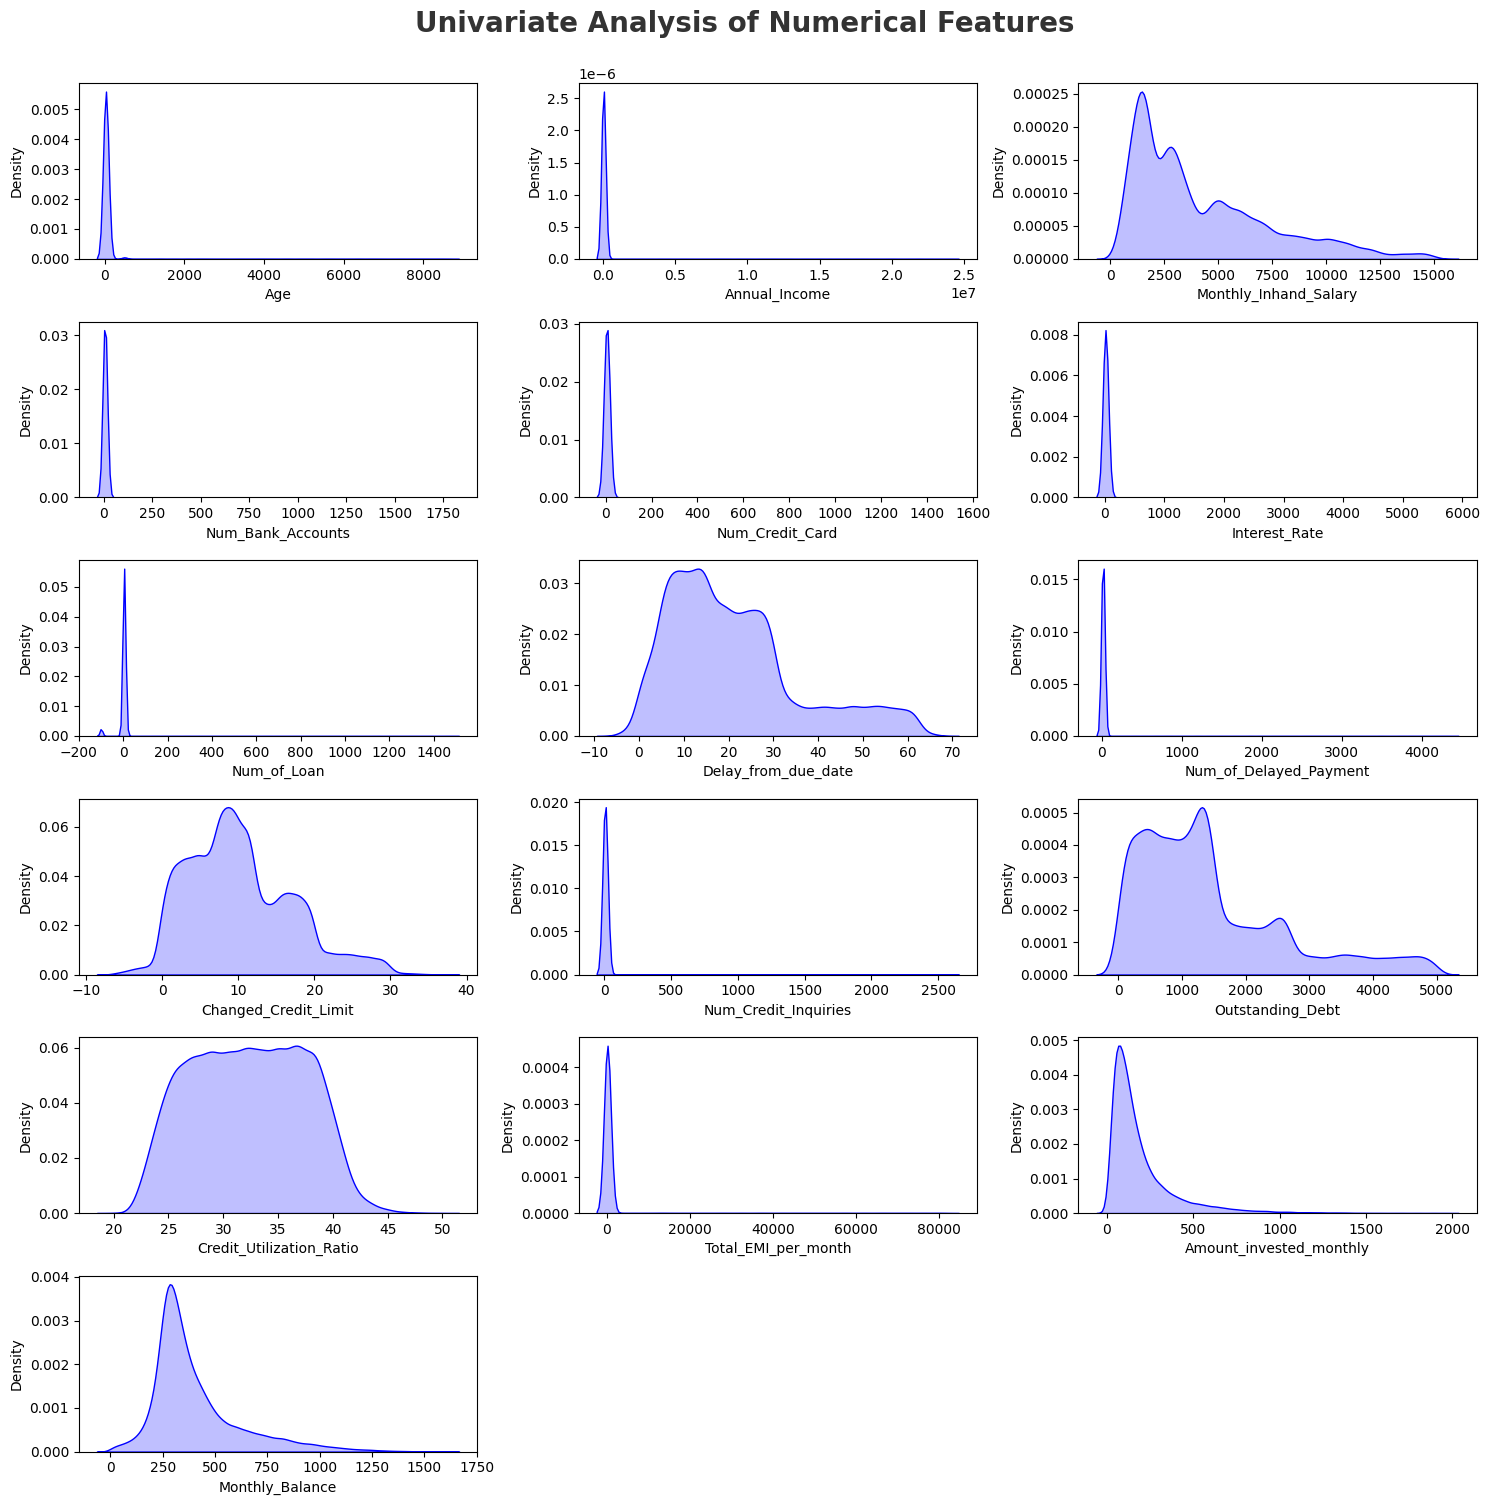

In [92]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_columns)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=df[num_columns[i]],shade=True, color='b')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

Above is the distribution of all numerical attributes

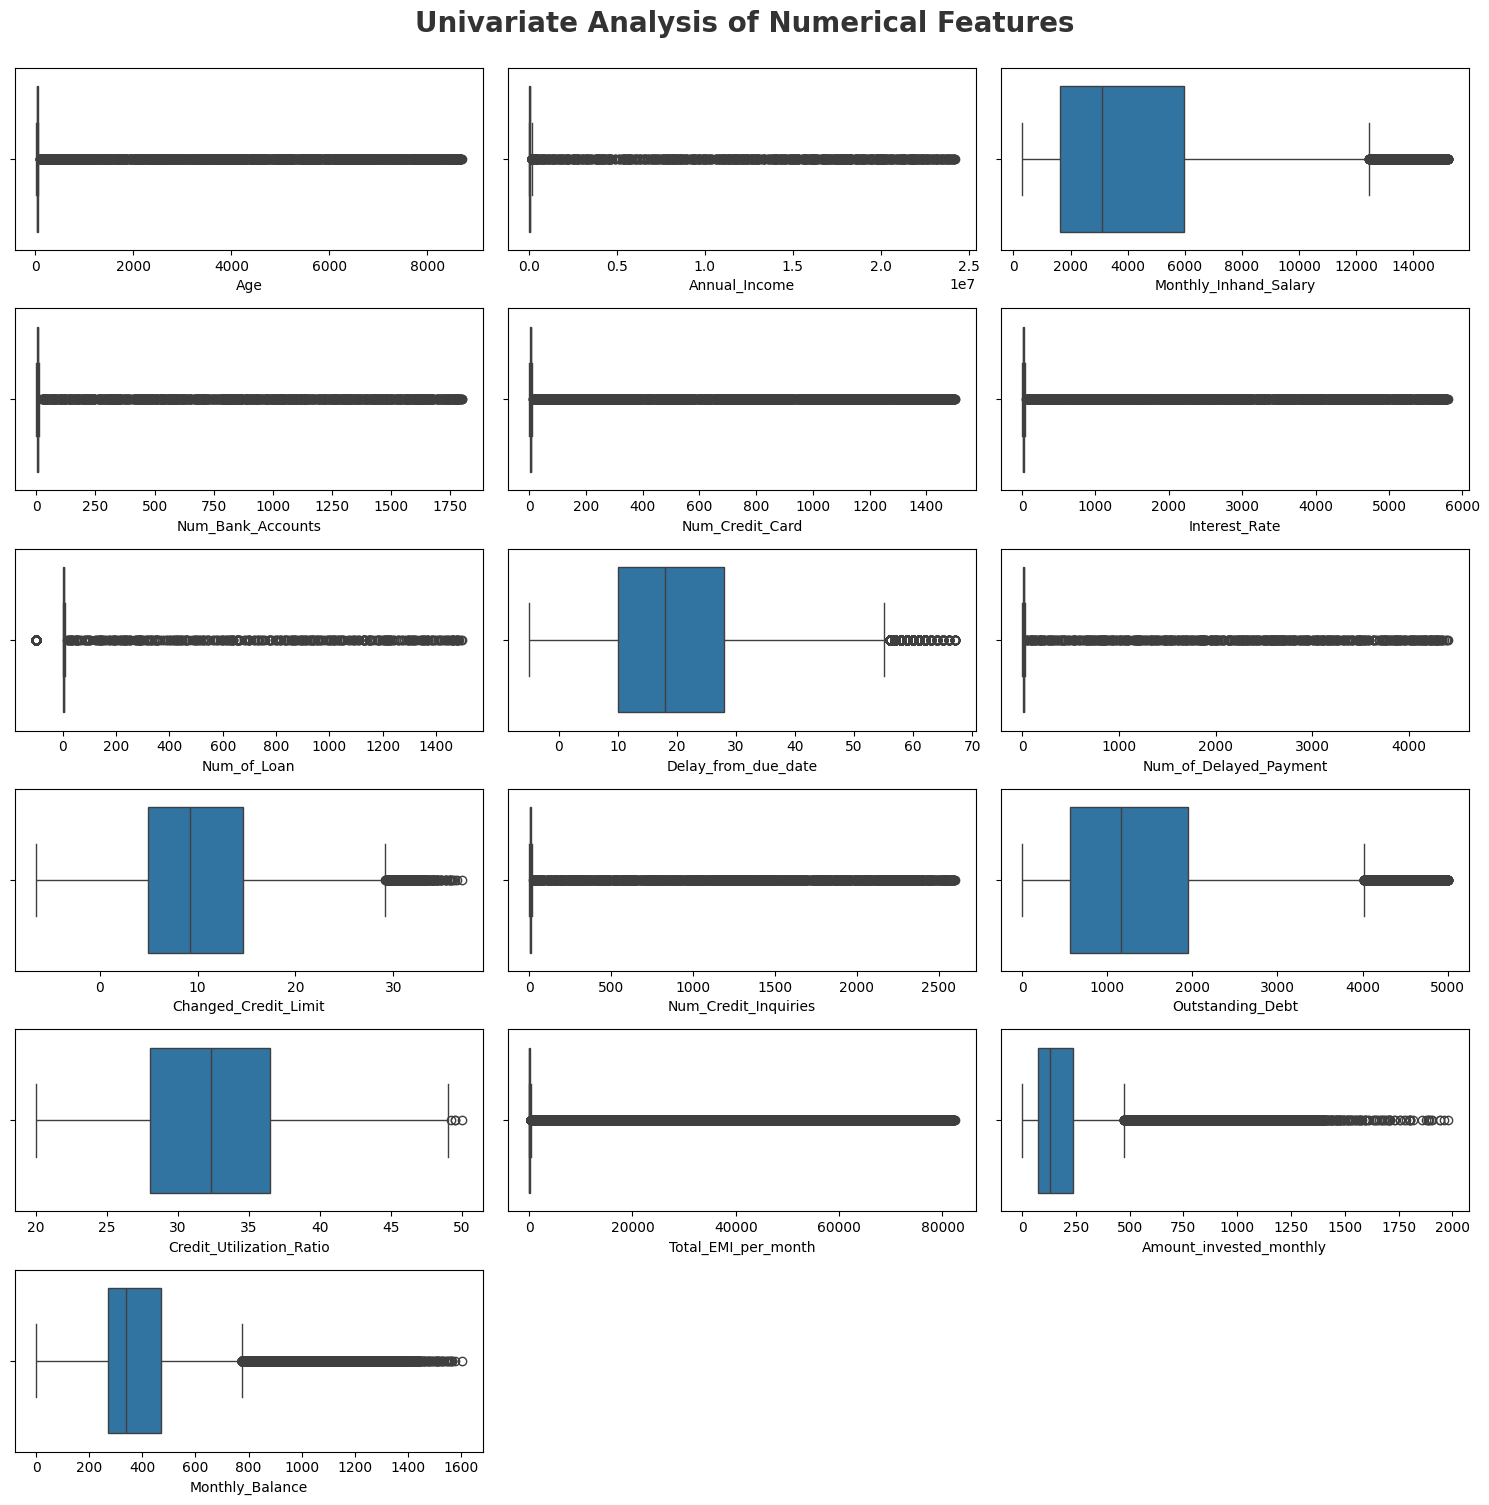

In [93]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_columns)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(x=df[num_columns[i]])
    plt.xlabel(num_columns[i])
    plt.tight_layout()

Above is the distribution of all numerical attributes where it can be seen collumns having alot of outliers

In [94]:
cat_columns = list()
CAT_THRESHOLD = 20

for col in df.columns:
  if df[col].nunique() < CAT_THRESHOLD:
    cat_columns.append(col)

In [95]:
cat_columns

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

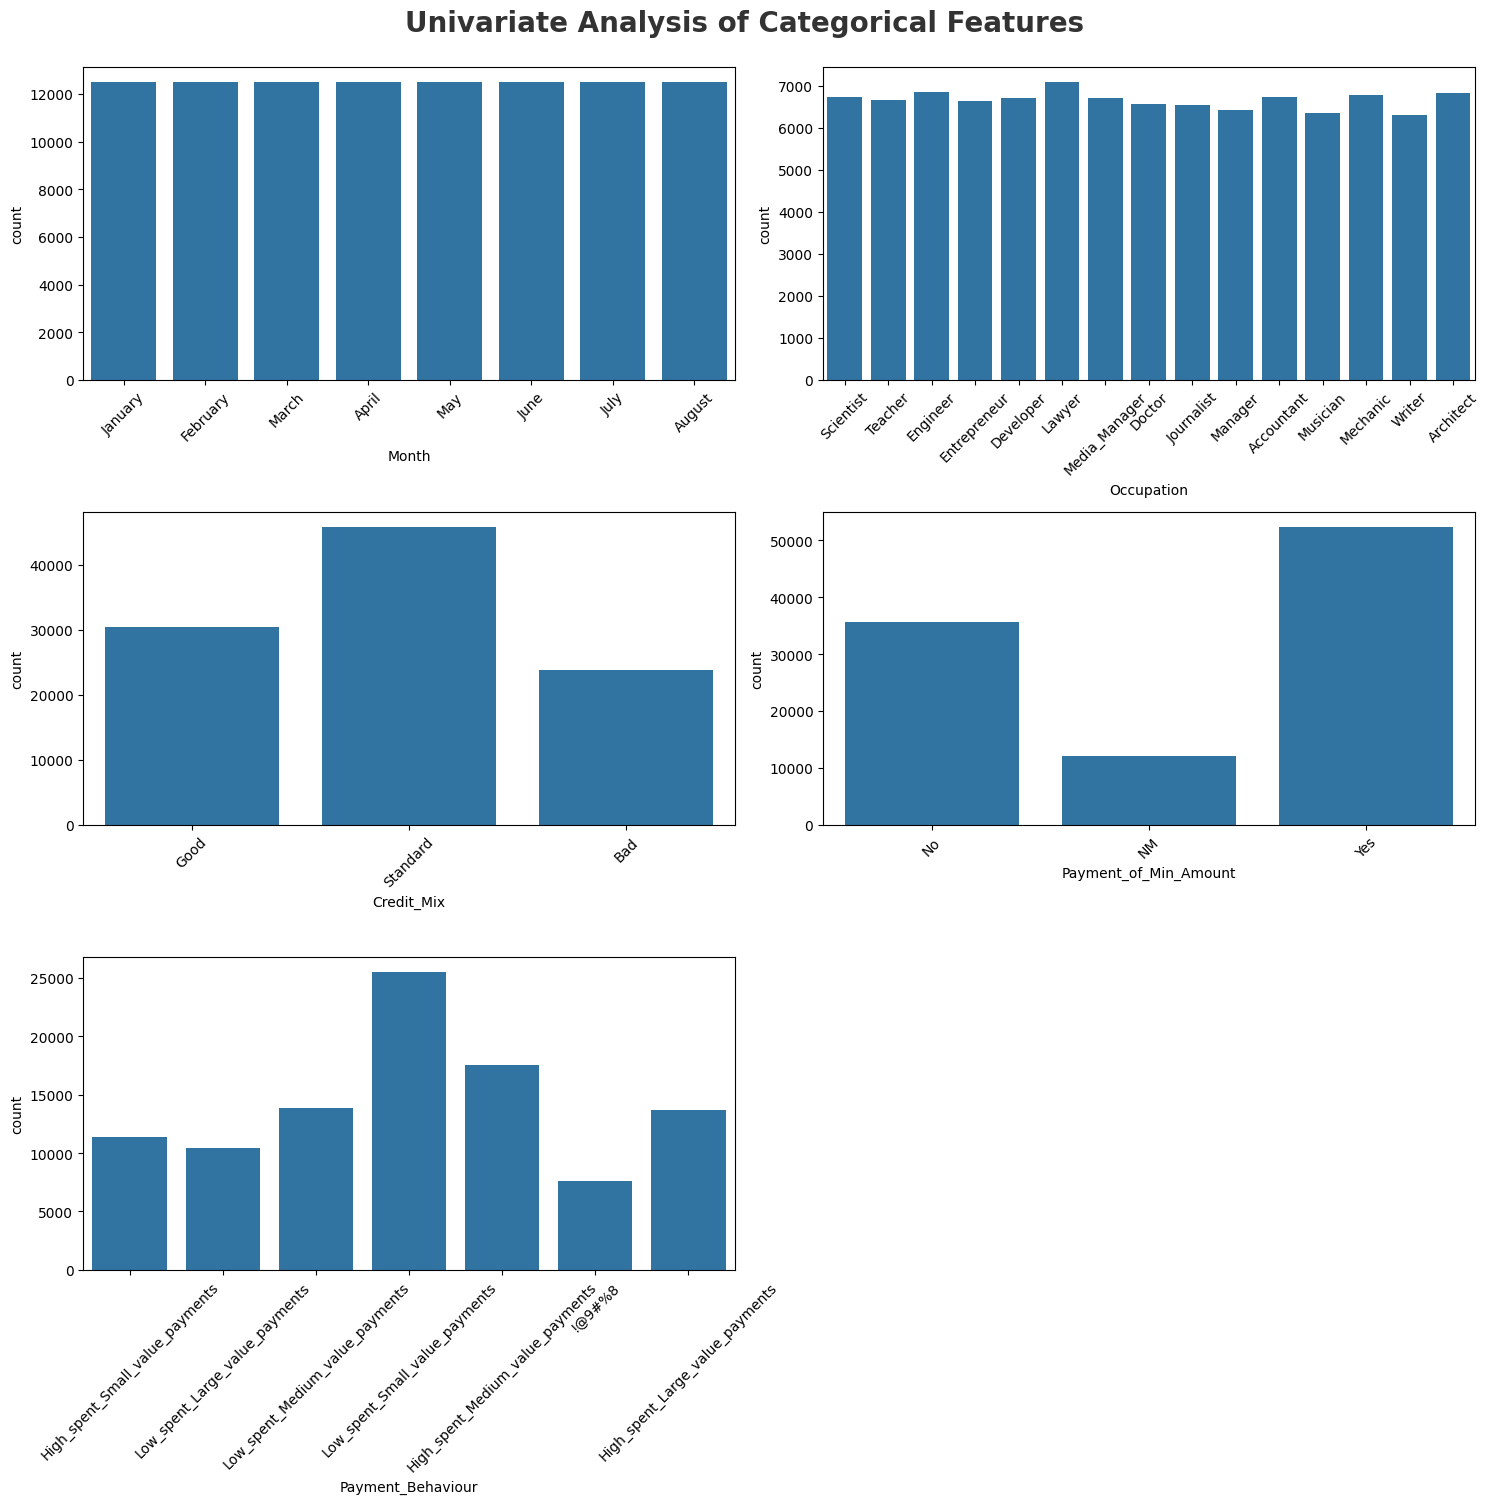

In [96]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_columns)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cat_columns[i]])
    plt.xlabel(cat_columns[i])
    plt.xticks(rotation=45)
    plt.tight_layout()



1.   Low spent medium value payments look to be the majority of the payment behaviour.
2.   Majority of the customers pay the minimum amount.
3.   Majority of the customers have a standard credit rating.





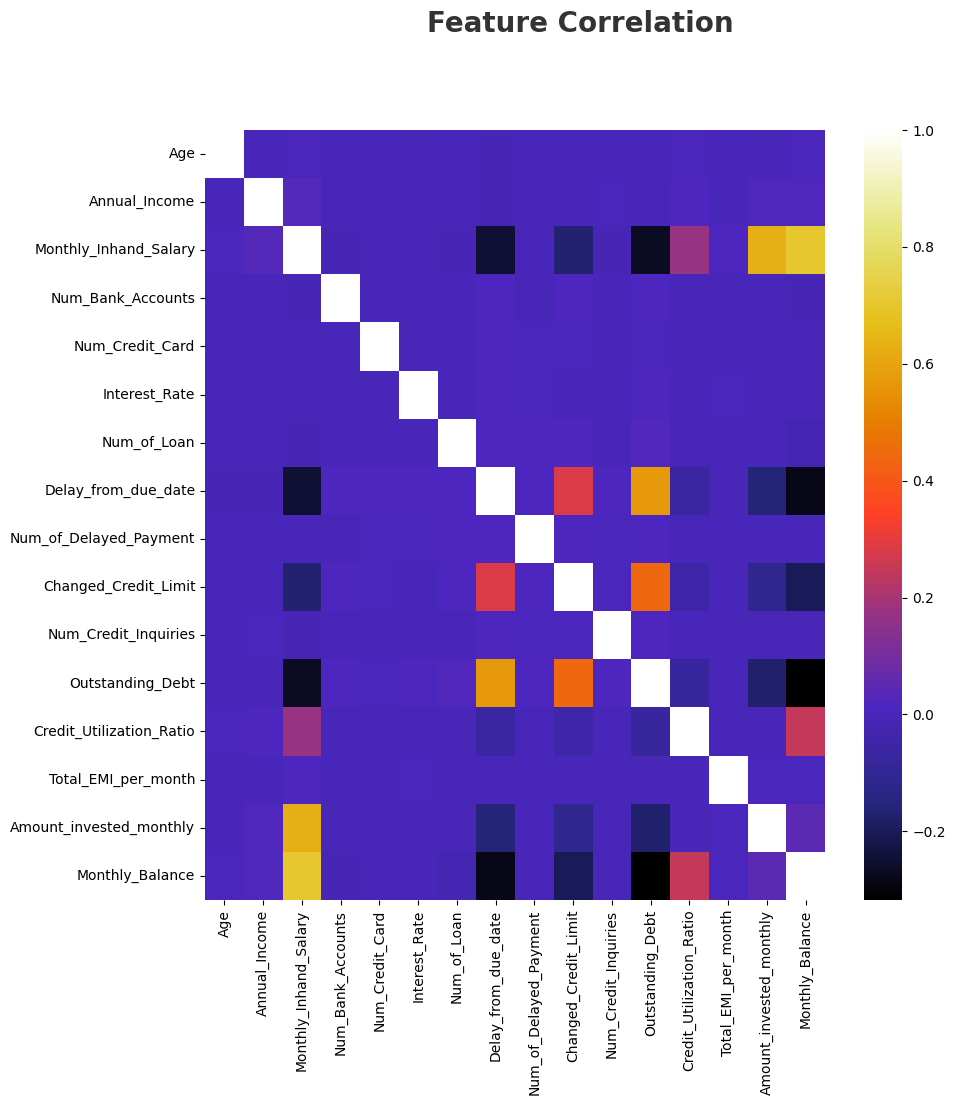

In [97]:
plt.figure(figsize = (10,10))
plt.suptitle('Feature Correlation', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.heatmap(df[num_columns].corr(), cmap="CMRmap")
plt.show()

In [98]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.944960,NA,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231


In [99]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

On aggregating the columns

In [100]:
agg_df = df.groupby('Customer_ID').agg({
    "Annual_Income": "max",
    "Monthly_Inhand_Salary": "max",
    "Num_Bank_Accounts": "max",
    "Num_Credit_Card": "max",
    "Interest_Rate": "max",
    "Num_of_Loan" : "max",
    "Delay_from_due_date": "max",
    "Num_of_Delayed_Payment": "max",
    "Changed_Credit_Limit": "max",
    "Num_Credit_Inquiries": "max",
    "Outstanding_Debt": "max",
    "Credit_Utilization_Ratio": "max",
    "Total_EMI_per_month": "median",
    "Amount_invested_monthly":"median",
    'Monthly_Balance':'median'}).reset_index()

In [101]:
agg_df.head()

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,CUS_0x1000,30625.94,2706.161667,6,5,27,2,67,28.0,2.63,11.0,1562.91,40.082272,42.941090,145.467484,340.080534
1,CUS_0x1009,52312.68,4250.390000,6,5,17,1094,10,1749.0,9.73,4.0,202.68,40.286997,108.366467,152.968494,417.869641
2,CUS_0x100b,113781.39,9549.782500,1,4,1,0,19,9.0,11.34,2271.0,1030.20,43.829630,0.000000,520.541236,824.355725
3,CUS_0x1011,58918.47,5208.872500,3,3,17,3,29,17.0,14.42,1965.0,473.14,29.198639,123.434939,383.350845,263.677975
4,CUS_0x1013,98620.98,7962.415000,3,3,6,3,16,9.0,4.33,3.0,1233.51,41.920614,228.018084,320.088813,513.134603


EMI to Debt Ration - Tells % of how much a customers pays monthly to clear his outstanding debt.

In [102]:
agg_df['EMI_To_Debt_Ratio'] = agg_df['Total_EMI_per_month']/agg_df['Outstanding_Debt']

Invetsment to Debt Ration - Tells % of how much a customers invests monthly compared to his outstanding debt.

In [115]:
agg_df["Investment_To_Debt_Ratio"] = agg_df['Amount_invested_monthly']/agg_df['Outstanding_Debt']

Savings Ratio - Monthly Balance to Monthly Inhand Salary ratio tells us the amount a person saves

In [116]:
agg_df['Savings_Ratio'] = agg_df['Monthly_Balance']/agg_df['Monthly_Inhand_Salary']

In [117]:
agg_df['Credit_Utilization_Ratio'] = agg_df['Credit_Utilization_Ratio']/100

Calculating the scores:

**Methodology: **


1.   Considering sources of debt that is Num_of_Loan and Num_Credit_Card a person holds would be part of calculating ones credit score.
2.   Any delayed payment would lead to an increase in credit risk
3. Debt to Investment ratio outlines the amount of debt a user can afford
4. Credit utilisation ratio outlines the ratio a customer makes to use his credit

Thus all above factors outline the score of a customer.

Higher the score riskier would be allowing credit to the customer




In [118]:
agg_df["Score"] = (agg_df['Num_of_Loan']+ agg_df['Num_Credit_Card'])*agg_df['Num_of_Delayed_Payment']* agg_df["Investment_To_Debt_Ratio"] * agg_df['Num_Credit_Inquiries']*agg_df['Credit_Utilization_Ratio']

In [119]:
agg_df

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,EMI_To_Debt_Ratio,Investment_To_Debt_Ratio,Savings_Ratio,Score
0,CUS_0x1000,30625.940,2706.161667,6,5,27,2,67,28.0,2.63,11.0,1562.91,0.004008,42.941090,145.467484,340.080534,0.027475,0.093075,0.125669,0.804328
1,CUS_0x1009,52312.680,4250.390000,6,5,17,1094,10,1749.0,9.73,4.0,202.68,0.004029,108.366467,152.968494,417.869641,0.534668,0.754729,0.098313,23377.791493
2,CUS_0x100b,113781.390,9549.782500,1,4,1,0,19,9.0,11.34,2271.0,1030.20,0.004383,0.000000,520.541236,824.355725,0.000000,0.505282,0.086322,181.059382
3,CUS_0x1011,58918.470,5208.872500,3,3,17,3,29,17.0,14.42,1965.0,473.14,0.002920,123.434939,383.350845,263.677975,0.260885,0.810227,0.050621,474.167845
4,CUS_0x1013,98620.980,7962.415000,3,3,6,3,16,9.0,4.33,3.0,1233.51,0.004192,228.018084,320.088813,513.134603,0.184853,0.259494,0.064445,0.176226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,17032.785,1176.398750,0,1168,3808,3,14,11.0,13.86,5.0,1229.08,0.003843,33.299764,82.828925,280.587085,0.027093,0.067391,0.238514,16.679538
12496,CUS_0xff4,25546.260,2415.855000,8,7,14,5,16,14.0,10.83,5.0,758.44,0.003933,101.328637,110.758490,303.249291,0.133601,0.146035,0.125525,0.482500
12497,CUS_0xff6,117639.920,9727.326667,5,6,1,2,1,7.0,16.40,4.0,338.30,0.004250,126.638453,527.019623,734.676144,0.374338,1.557847,0.075527,1.483109
12498,CUS_0xffc,60877.170,5218.097500,6,8,27,8,46,19.0,12.82,13.0,1300.13,0.003829,272.809169,152.923588,339.864267,0.209832,0.117622,0.065132,1.779868


Outlines the credit score for each customer.

In [120]:
agg_df[['Customer_ID','Score']]

,Customer_ID,Score
0,CUS_0x1000,0.804328
1,CUS_0x1009,23377.791493
2,CUS_0x100b,181.059382
3,CUS_0x1011,474.167845
4,CUS_0x1013,0.176226
...,...,...
12495,CUS_0xff3,16.679538
12496,CUS_0xff4,0.482500
12497,CUS_0xff6,1.483109
12498,CUS_0xffc,1.779868
